In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import missingno as msno

In [2]:
df = pd.read_csv('Ecommerce Customers.csv')
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


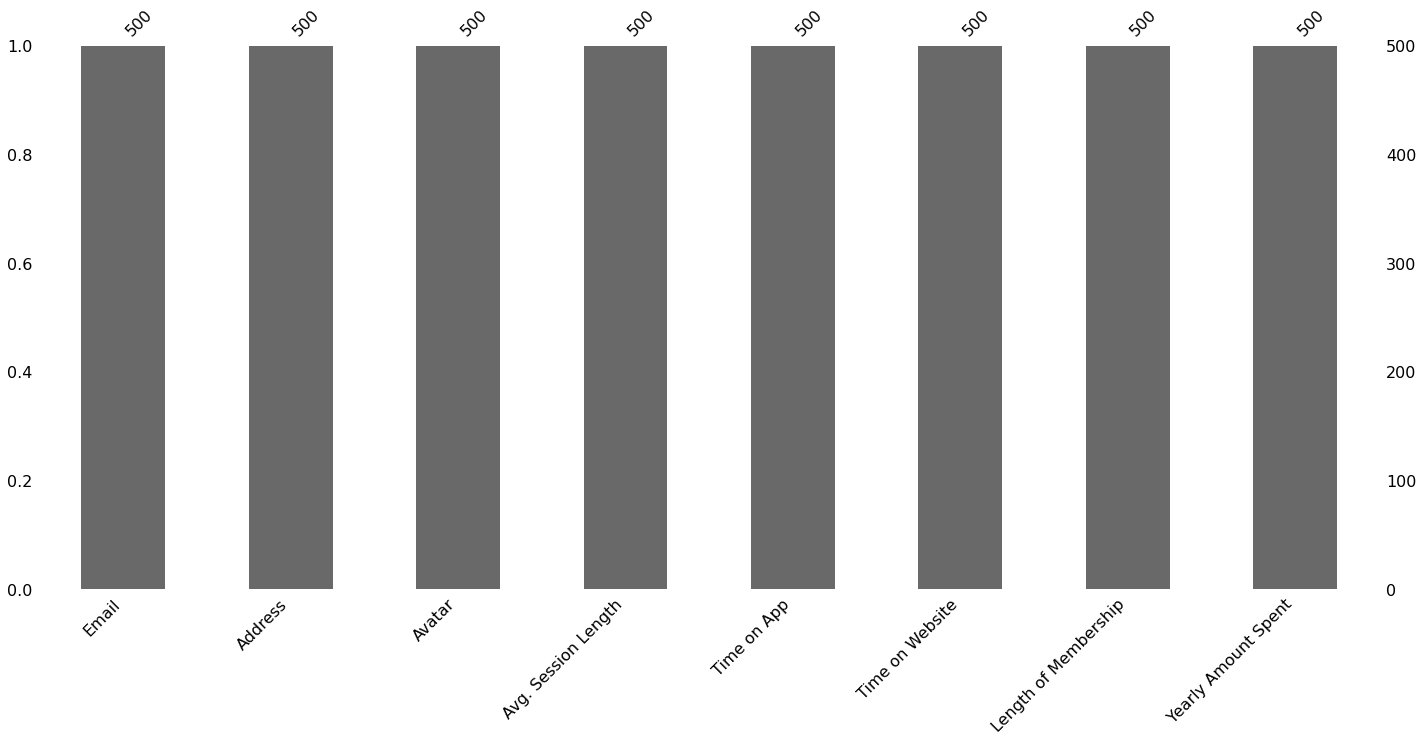

In [4]:
msno.bar(df)

- There No missing data

In [5]:
plt.style.use('ggplot')
plt.style.use('seaborn-talk-custom')
palette = sns.color_palette('muted')
palette

[(0.2823529411764706, 0.47058823529411764, 0.8156862745098039),
 (0.9333333333333333, 0.5215686274509804, 0.2901960784313726),
 (0.41568627450980394, 0.8, 0.39215686274509803),
 (0.8392156862745098, 0.37254901960784315, 0.37254901960784315),
 (0.5843137254901961, 0.4235294117647059, 0.7058823529411765),
 (0.5490196078431373, 0.3803921568627451, 0.23529411764705882),
 (0.8627450980392157, 0.49411764705882355, 0.7529411764705882),
 (0.4745098039215686, 0.4745098039215686, 0.4745098039215686),
 (0.8352941176470589, 0.7333333333333333, 0.403921568627451),
 (0.5098039215686274, 0.7764705882352941, 0.8862745098039215)]

In [6]:
def get_dist(df,column,color=palette[0]):
    sns.histplot(data=df,x=column,color=color)
    plt.title(column)
    plt.tight_layout()

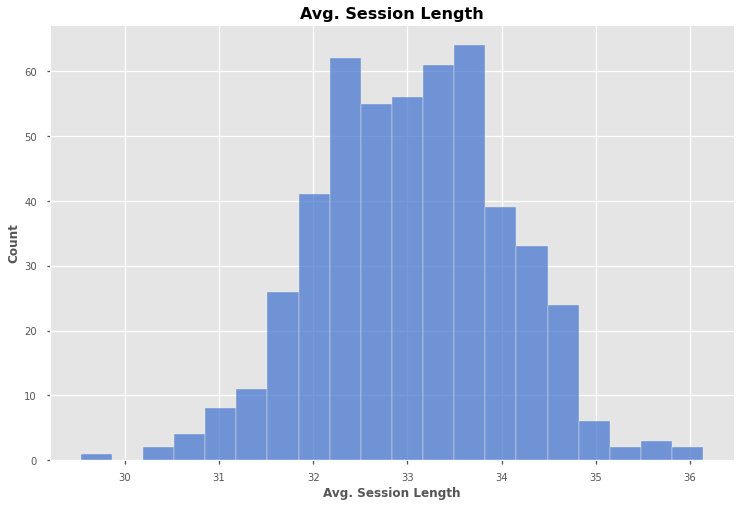

In [7]:
get_dist(df,column='Avg. Session Length')

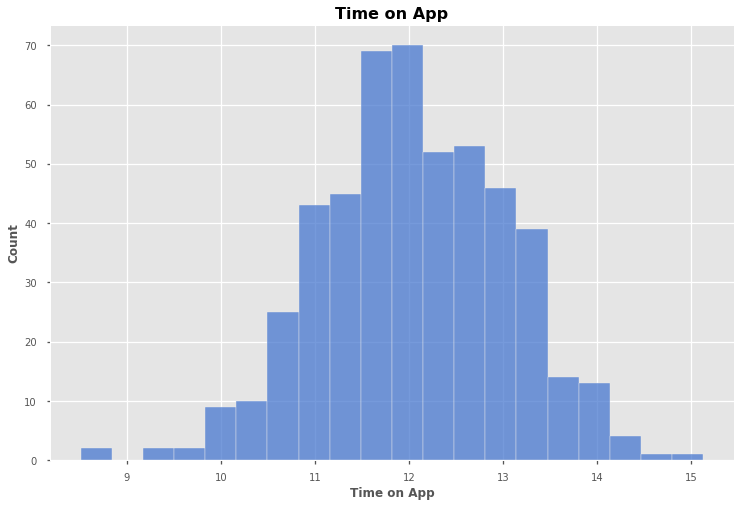

In [8]:
get_dist(df,column='Time on App')

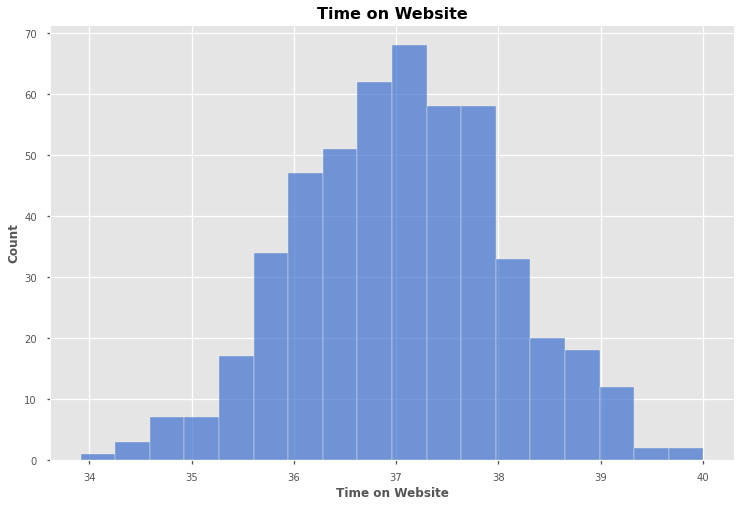

In [9]:
get_dist(df,column='Time on Website')

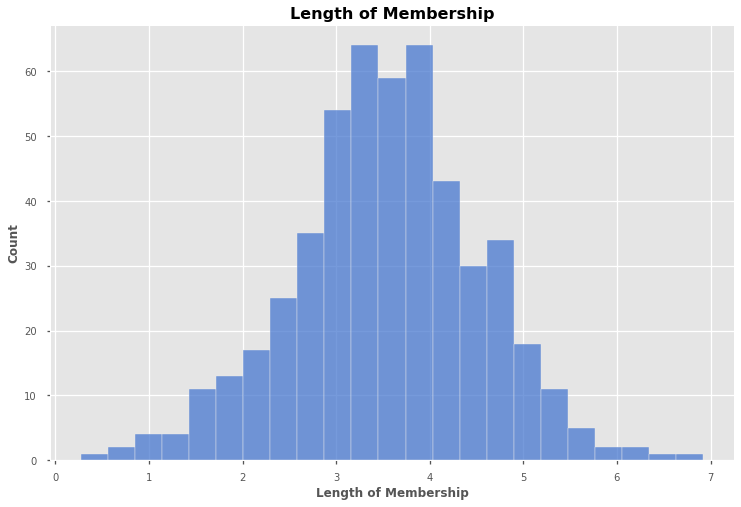

In [10]:
get_dist(df,column='Length of Membership')

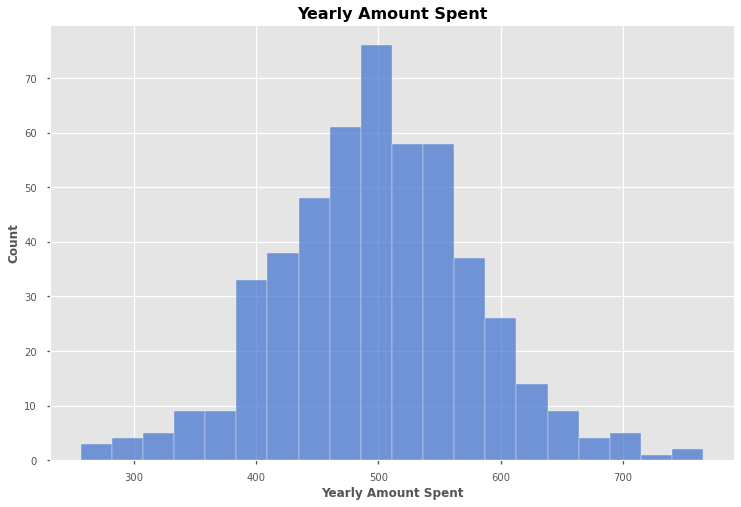

In [11]:
get_dist(df,column='Yearly Amount Spent')

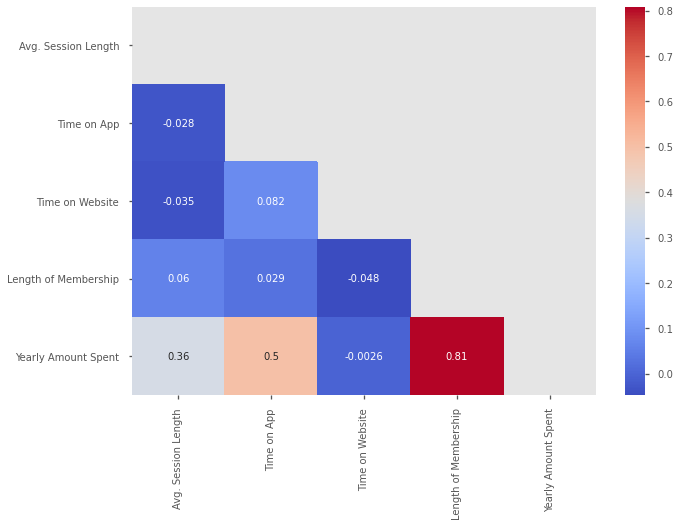

In [12]:
corr=df.corr()
sns.heatmap(corr,mask=np.triu(np.ones_like(corr, dtype=np.bool)),cmap='coolwarm',annot=True)

In [13]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score,mean_squared_error, accuracy_score, explained_variance_score

In [14]:
X = df.iloc[:,3:7]
y= df.iloc[:,-1]

In [15]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [16]:
sk_lm = LinearRegression()
sk_lm.fit(X_train,y_train)
sk_lm_preds = sk_lm.predict(X_test)
print('RMSE: ',np.sqrt(mean_squared_error(y_test,sk_lm_preds)))
print('R2: ',r2_score(y_test,sk_lm_preds))

RMSE:  8.522377991091831
R2:  0.9895714025464771


In [17]:
sk_dt = DecisionTreeRegressor()
sk_dt.fit(X_train,y_train)
sk_dt_preds = sk_dt.predict(X_test)
print('RMSE: ',np.sqrt(mean_squared_error(y_test,sk_dt_preds)))
print('R2: ',r2_score(y_test,sk_dt_preds))

RMSE:  29.876222828899916
R2:  0.871839055650046


In [18]:
en_lm = ElasticNet(alpha=0.1,l1_ratio=0.5)
en_lm.fit(X_train,y_train)
en_lm_preds = en_lm.predict(X_test)
print('RMSE: ',np.sqrt(mean_squared_error(y_test,en_lm_preds)))
print('R2: ',r2_score(y_test,en_lm_preds))

RMSE:  9.852434941057554
R2:  0.9860622885067265


In [19]:
param_grid = {'max_iter':[100000],
              'alpha':[0.00001,0.0001,0.001,0.01,1,10],
              'l1_ratio':np.arange(0,1,0.1)}

In [20]:
xgb_lm = xgb.XGBRegressor()
xgb_lm.fit(X_train,y_train,early_stopping_rounds=5,eval_metric='rmse',eval_set=[(X_test,y_test)],verbose=False)
xgb_lm_preds = xgb_lm.predict(X_test)

In [21]:
print('RMSE: ',np.sqrt(mean_squared_error(y_test,xgb_lm_preds)))
print('R2: ',r2_score(y_test,xgb_lm_preds))

RMSE:  18.28977699425996
R2:  0.9519690541162825


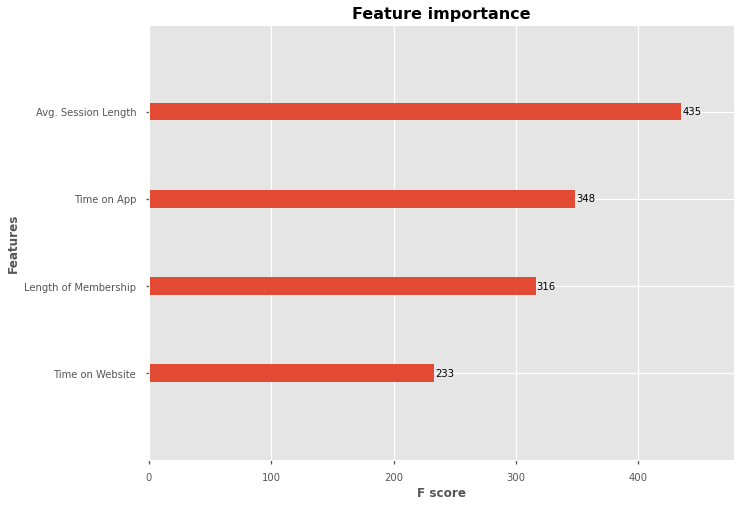

In [22]:
xgb.plot_importance(xgb_lm)
plt.tight_layout()

In [44]:
results = {'Model':['Sk linear','SK DecisionTree','ElasticNet','XGBRegressor'],
           'RMSE':[np.sqrt(mean_squared_error(y_test,sk_lm_preds)),np.sqrt(mean_squared_error(y_test,sk_dt_preds)),
                   np.sqrt(mean_squared_error(y_test,en_lm_preds)),np.sqrt(mean_squared_error(y_test,xgb_lm_preds))],
           'R2':[r2_score(y_test,en_lm_preds),r2_score(y_test,sk_dt_preds),r2_score(y_test,en_lm_preds),
                 r2_score(y_test,xgb_lm_preds)]}
results_df = pd.DataFrame(results)

In [45]:
results_df

,Model,RMSE,R2
0,Sk linear,8.522378,0.986062
1,SK DecisionTree,29.876223,0.871839
2,ElasticNet,9.852435,0.986062
3,XGBRegressor,18.289777,0.951969


- We cans ee that the Scikit-Learn LinearReagressor had the lowest RMSEfollowed closely by the ElasticNet model. Both had similar R2 scores, however teh RMSE is slightly higher for the ElasticNet.